In [1]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
import skimage.io as io
import pandas as pd
import json
from pandas import DataFrame as df
import math
%matplotlib inline

Using TensorFlow backend.


In [2]:
modelfile='fashion4.model'
labelbinfile='mlb4.pickle'
# load the trained convolutional neural network and the multi-label
# binarizer
print("[INFO] loading network...")
model = load_model(modelfile)
mlb = pickle.loads(open(labelbinfile, "rb").read())

[INFO] loading network...


In [3]:
import urllib
url='https://m.iammickey.com/web/product/big/201904/f5cfe23de27cc1c3f502b8e80d2eb245.jpg'
resource = urllib.request.urlopen(url)
output = open("file01.jpg","wb")
output.write(resource.read())
output.close()
imagefile='file01.jpg'

[INFO] classifying image...


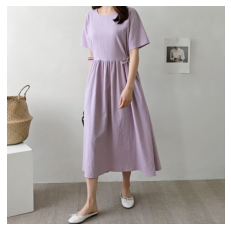

5부: 0.00%		미니: 0.05%		기하학: 0.00%		A라인: 86.75%		red: 2.66%		
7부: 14.17%		미디: 6.75%		도트: 0.03%		H라인: 10.11%		green: 1.18%		
긴팔: 79.59%		롱: 96.50%		레오파드: 0.00%		랩: 0.55%		blue: 28.75%		
민소매: 0.06%					레터링: 0.00%		머메이드: 1.49%		black: 0.29%		
반팔: 13.84%					로고: 0.00%		벌룬: 0.05%		
캡소매: 0.00%					무지: 98.10%		언밸런스: 0.23%		
						스트라이프: 6.31%	플리츠주름: 0.65%		
						아가일: 0.00%		
						체크: 0.02%		
						츄리닝: 0.00%		
						캐릭터: 0.00%		
						프린트: 0.02%					
						플라워: 0.16%					


In [4]:
# load the image
image = cv2.imread(imagefile)
output = imutils.resize(image, width=400)
 
# pre-process the image for classification
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


# classify the input image then find the indexes of the two class
# labels with the *largest* probability
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idxs = np.argsort(proba)[::-1][:14]

# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
	cv2.putText(output, label, (10, (i * 30) + 25),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show the probabilities for each of the individual labels


# show the output image
#cv2.imshow("Output", output)
#cv2.waitKey(0)
I = io.imread(imagefile)
plt.imshow(I); plt.axis('off'); plt.show()
print("{}: {:.2f}%".format(mlb.classes_[0], proba[0] * 100),end='\t\t')#5부 0
print("{}: {:.2f}%".format(mlb.classes_[18], proba[18] * 100),end='\t\t')#미니 18
print("{}: {:.2f}%".format(mlb.classes_[8], proba[8] * 100),end='\t\t')#기하학 8
print("{}: {:.2f}%".format(mlb.classes_[2], proba[2] * 100),end='\t\t')#A라인 1
print("{}: {:.2f}%".format(mlb.classes_[7], proba[7] * 100),end='\t\t');print();#red 6
print("{}: {:.2f}%".format(mlb.classes_[1], proba[1] * 100),end='\t\t')#긴팔 9 
print("{}: {:.2f}%".format(mlb.classes_[19], proba[19] * 100),end='\t\t')#미디 19
print("{}: {:.2f}%".format(mlb.classes_[10], proba[10] * 100),end='\t\t')#도트 10
print("{}: {:.2f}%".format(mlb.classes_[3], proba[3] * 100),end='\t\t')
print("{}: {:.2f}%".format(mlb.classes_[6], proba[6] * 100),end='\t\t');print();#green 5
print("{}: {:.2f}%".format(mlb.classes_[9], proba[9] * 100),end='\t\t')#반팔
print("{}: {:.2f}%".format(mlb.classes_[15], proba[15] * 100),end='\t\t')#롱
print("{}: {:.2f}%".format(mlb.classes_[12], proba[12] * 100),end='\t\t')#레오파드:
print("{}: {:.2f}%".format(mlb.classes_[11], proba[11] * 100),end='\t\t')#랩
print("{}: {:.2f}%".format(mlb.classes_[5], proba[5] * 100),end='\t\t');print();#blue
print("{}: {:.2f}%".format(mlb.classes_[20], proba[20] * 100),end='\t\t\t\t\t')#민소매
print("{}: {:.2f}%".format(mlb.classes_[13], proba[13] * 100),end='\t\t')#레터링
print("{}: {:.2f}%".format(mlb.classes_[16], proba[16] * 100),end='\t\t')#머메이드
print("{}: {:.2f}%".format(mlb.classes_[4], proba[4] * 100),end='\t\t');print();#black
print("{}: {:.2f}%".format(mlb.classes_[21], proba[21] * 100),end='\t\t\t\t\t')#H라인 2
print("{}: {:.2f}%".format(mlb.classes_[14], proba[14] * 100),end='\t\t')#로고
print("{}: {:.2f}%".format(mlb.classes_[22], proba[22] * 100),end='\t\t')#벌룬
;print();#기타
print("{}: {:.2f}%".format(mlb.classes_[29], proba[29] * 100),end='\t\t')
print("\t\t\t{}: {:.2f}%".format(mlb.classes_[17], proba[17] * 100),end='\t\t')#무지
print("{}: {:.2f}%".format(mlb.classes_[25], proba[25] * 100),end='\t\t');print();#언밸런스
print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[23], proba[23] * 100),end='\t')#스트라이프
print("{}: {:.2f}%".format(mlb.classes_[33], proba[33] * 100),end='\t\t');print();#체크
print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[24], proba[24] * 100),end='\t\t')#아가일
;print();#플리츠주름
print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[26], proba[26] * 100),end='\t\t')
;print();#캐릭터
print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[27], proba[27] * 100),end='\t\t');print();#파이톤
print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[28], proba[28] * 100),end='\t\t');print();#프린트
print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[31], proba[31] * 100),end='\t\t\t\t\t');print();#플라워
print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[32], proba[32] * 100),end='\t\t\t\t\t');print();#플라워

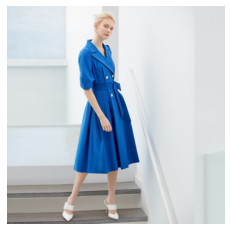

https://cr2.shopping.naver.com/adcr.nhn?x=KDcxPTT0%2B3fbybqbAAObh%2F%2F%2F%2Fw%3D%3DsztJyltgD6LBOFjT2vFKSyD7b8HOlTaT43dn8XsLVVro4AizsnCfgAcDpUHSFr4t8vIjh6iyehwj988gWrL7UZmM5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiC8LPR8FqmtHWq4Rh0Pee9IKhDlAIPN5YbISPV841D8jy%2FuciXEcimCJtJLus%2BPhtsc%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58MkejT9V33NZIKz4boeM3Ui0p7s9FhvzydGXWwUcwaheFJvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ%2F8L3Xnd2EtoZmFe9V38bhpihxbKSt%2BGCsHB3mQ5owYt8faDjCW6HUREq33zSyI9snBvCzFpQWv1hKf37gEv8fdegnkXhrO0Cf3o7nJoJV1Y831TDKgAq5PvodcuK%2FquzKNctt6MUzw%2FAbrSgzBKI8BwUXRqJ60%2FxJ8ZOen2HX3K9YdywgZu5hYkkk9F2GGKpG3pPrlFxtI46DlqbdqYFAbHqnw3X1OUqd1XcYBjZJuDwhzSQp5DARYPhy4Im4saOwyKU5Yr2QyQyEwhL4UyPCQR3ww63JR%2FxNZNQEFGIv9EBmyiPTMPQMIIIgZdRBeYlPsXMqvnHmKOvU7SH86TqCZF1pCWRUvJxkGZw%2FAKoXHZmZaXCDP6Iy55%2FO6xwebu06bVktbD4XnHxYf4ABq9Bam&nv_mid=11546831178&cat_id=50000807


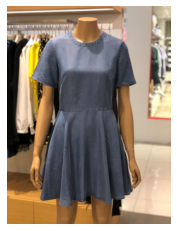

https://cr2.shopping.naver.com/adcr.nhn?x=F27zbgLDrXhgN7JI3T5Ji%2F%2F%2F%2Fw%3D%3Ds4flp7TpKOsrHpw%2FPCzrKjgZk5ipiETMr69nHqqM6b0ycOmJ4gEHogHM6eRwdXr%2Fxyadg7wfW3p3bXyC1DmICcWVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTj9mbu6E9R4z1ga6m%2FLICl3873KzzPYk6VV0fK0TVG7VBDhkmwFnw14XbZr4ioPWCUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhECIJO5MObAqPoGjgJKyr8GEA7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB8%2BxcR6rcIPfO1vqekmYyuDJTZXBSNk8nZMnnVxIe%2Bpb0D%2BhhiJy%2BeDJvd2vJjkI8Y2wWEAvoxYqNbPe450639zrC4rx5h8QYe6H8ojYaFP3RMtK1ic%2Fgvo2aMVZEOSm3IR5SNS1%2FXO1RoO8pVYjIT3%2Ben3zj06NpwRCiXZwj8aZYBdd7TYHc3OrKXpdR9FkklpJZwxXfgHqqCAwuH%2FyEyyWpTgTh70MxFCciJfsSRRYkb0rOSlEA7NiFLVeGlYO6POdDnzk0pDkjnglzNHYBgHv1d%2F5ISK6DY0lQqj80ncplYNE6w6K%2BWMWt9L%2FBMBei1lpNlLGdSvWJhS3jWi%2BkiNHcXbxWJynerNJp%2F762tGqlaNaw3gdIYDMrw5lLe4RRrb3dTRUEqWjCk5lCXffLaYRASbuaaoTpAJnCWxp6RdcZtWS1sPhecfFh%2FgAGr0FqY%3D&nv_mid=82358236606&cat_id=50000807


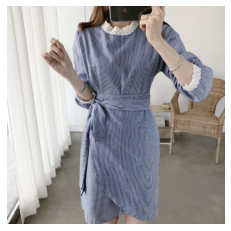

https://cr2.shopping.naver.com/adcr.nhn?x=42Id33VmLj7K7Fjp0BTojf%2F%2F%2Fw%3D%3DskZB8exB1rpTNg9BQvTpt1IDMUI1aAmZdZxLGL8R9WASuTuspK%2FrlufkgZgV%2B0zP0GpwfvbgfP7RrJoeDbak5JIYlFAdf1OFsetsPTCIBnAtPOdYsvqvAV2kweJQXbUmGswBQLn1Qi9rbU5IeWroMEpHmM9qyamz%2FYroGT79EEFjUYYlTAm92Id%2Bv3f%2B72lBoDTj4NrXzs78E5ZjhTpQl359%2Bw5fyb2S%2B0WKUIuNO0Akl8HAYn6NkzRDrGPGQ2ZUxEjTquPk3wvrhCb2nywTHg0aAb%2FOdjaJ2XbA%2BJKlL%2B499LsW4RgipVPKA%2F2IN4cAJ4mmic2vQ8l3OPvPdLBTB5%2B6UB08G4lR0a9fquA%2FPNrL77UpqYG%2BBFF6a4ZDvSKydgHNH2%2FpcXv81nw64PtMeFRrv6tDzHWai9n4avpR9ePhSGRpx1JoTpDJUXJS4Kg%2BP%2FMDeKGBrg27XzCWUrgxX%2Brb1B3fgb847FjXNUTqA68rFr2lsms4HqF86IIYbO5PDGQwhzaTqh7NWmIj0BsH8r4Y3kIrDewf4tH7kUaml%2BT%2Fa8UhFHP4M%2BDlr07RRwbN4CJqVRC8LuZAz2ReLfpvxSfJlxHsVv3OjZRZH3NbKgUtF79ZXmqXE%2FjSz6x7KfxrV%2FUZW0NtfQGgfXMUeaDr6pLOu7lmdP%2B8YE2kiH4aJoWMi07slbz8%2FRwkcBTw4GNeK%2BGtpOrGO0FguJkNvznkrkGNi1zv9Z5nFwEPWHCBj5%2BE6jSN0QoSVHhyO96WD4lDL%2FOHQi83Vy7W%2Bc%2FqrVPMAxsHPvAbFJPmXWAwE02%2BwPCs%3D&nv_mid=82391253219&cat_id=50000807


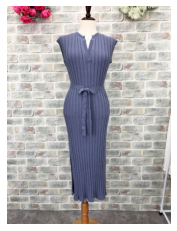

https://cr2.shopping.naver.com/adcr.nhn?x=4FbMU2pMzXLp7ULxGVxwDP%2F%2F%2Fw%3D%3DsAYkrReOwi38Ohfi6n4amF8rUdVLbIlbI6qN98cEuJvEJFMCya5%2Bk0uhNWamKf4kd%2F%2F7YTCLJ3zAemaGbYD2hh2Vyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTyAFVg7kaOX4xboP%2FLLAxY0K0d%2Br0i2RhIN6X3XznIDyUB6sZx2rY9WJd72XBzUqCUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BIsLTlT5Q9MFvlwX5tuPSmkhiFK%2Bss3mJXlIWDvq2VxOw7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB%2FyL9037P3PGXDTo2jr6folBqVBD54d1zDthcNns5TXHUD%2BhhiJy%2BeDJvd2vJjkI8YDjv%2FPblzMwpRQ47v6TH6oZRjBzwAks9dvvNEX96aQpis3EtCJ0i8qI9U3lpka1TSNj2GW4Ea%2BhSMrrGhCUZn24CaRBzkEi7qXiteifLNLpJtPH5cpNFdE9L0GpnfJQhR9q1xmLu2mfJkskQvmIjyWTNWoyvKq6r0uEU8y9Fdpar9Xf%2BSEiug2NJUKo%2FNJ3Kbmeh8WB4jOGoJWIugjY4e%2FdPqXVUcbhELDER8PKn7%2BYhKHx4deiKib2GvQt1Zza3yM4T9MmNAyVzF9ZamSC55RZpyV5QkosscjNH9q3p96E%2FUfAB6zHoNPHQAiZa1MfzqygNkojt5GKVbSf2ZT5ISL&nv_mid=80010069740&cat_id=50000807


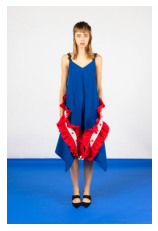

https://cr2.shopping.naver.com/adcr.nhn?x=AMrhwxsnnyLG5oVYsNrYOf%2F%2F%2Fw%3D%3Ds6fHA9zwmpRXtLG0QLTvK9Y%2FTcOm5OPUyVErAB%2F9PwaokJD8ErbzJs312uCeotursybY4Seb2oVGjiInrOxvtf2Vyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTjIfaQgieUMY5xueFv9mUPRFX2RJsnIXpHw2FFxBtrTsjqOidw1rVwMCtVoQza8F%2FUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BIsLTlT5Q9MFvlwX5tuPSmkRT1WfQCRYVzBCjCZgtVymQ7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB9iPWCRljpAregdBFZsjvp0V6veSTkDaKgGlxrsXSgkwvGhB8Ps6FHHxGqpxVzRGw1LZ%2F3mHXmPlax%2FdBk2nzi8%2BietX7fRlpkIiVO3j1Om5YiKFhwGpSvjbuBV3spadu%2BDHilHV6p76z1nqKi4Lc1x2JSjM1T6OPEWRypEm7PYN0JKuAcYDZT47i5qICAB7XAOROpXx4r7niJmeivn79LCcbYNevNZ8xmbZTJaAMh%2B1SvtgA5Zeh%2FJlANMnkWMiPZk3U08zyqZQ0dDE9KIDnTfe3FkEkMEAaD0Eo2zFEU57feEBS%2BNHH6vsoeEwhb7y05RxGsXE54WyA6F5pWdNXw5tdgw36gyeLmi1DB1Th%2F5aYMGn5GoJaciueMze3B9BI9mkPVg21BdgvVHgSxBDZzv&nv_mid=11648250689&cat_id=50000807


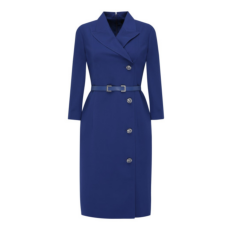

https://cr2.shopping.naver.com/adcr.nhn?x=YRflLasCipitqXDybWD7QP%2F%2F%2Fw%3D%3Ds3u9rK%2FzADdxrXHyU%2Br65WsIlrL0YnJNWbknvKpptu7rEY6qgaMS%2BrLGsThqAFaB9n80xHpeiO4q39Wz7%2BG2LHWVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFT2f9IUDyWDZY9rrT7Zr0Zmb7CZWTF7i%2B3xapn9QbAI%2BIFPonar5eB3LgPbhFD0kQ5UaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhEC4fJQZKoEc6E2TC5nOkyEfA7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB8iTiOy2pR6S78ygrTUIhk8GFiSDBMsg9%2F%2F9M2%2BQ%2B0KjUD%2BhhiJy%2BeDJvd2vJjkI8ab0M7yf3qTNtK1PMwf6Amz1xcOC0i1rIfzdlYoudXAFz7GFYqE4mCnaf136P6MKHOHXy7YUayCbUw5jgIYnbSLGXEkJoua5Y3WEDIjruM1jr%2F%2BJ74HwciKeh%2Bc5KMvDQ6fERs1pk9bW94dyQN51pXs%2BLbhIwMkJ8VsZMwKHrvR2uXv4u%2BeRZBe778S41FDTsIrQ%2FgVkuu4%2FXOpWRnedt%2F8%2BB3eGfKQB%2FmIyaA9AtRtLkKAB9xeTEkxZ%2FRCo1LBvsjV%2FeE88mtuBFlU0JmXgG5UBvTcS6rqlDCt%2FGthe6QeIDAaXFqIrxvzpecAaGTf3RUFiMOapSRduHppQQLEr5ix&nv_mid=82125324028&cat_id=50000807


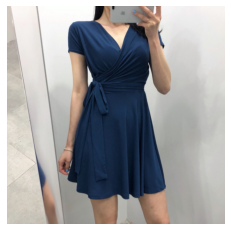

https://cr2.shopping.naver.com/adcr.nhn?x=SpZ1yU0dA6WldEcpmdMEd%2F%2F%2F%2Fw%3D%3Dsjw0OQYUzk82KC6hrbEULL0MtoiXeoDjJ%2Fvn5YuLdw5kofEXlUIRI5S9uyvG3s3S76GfNwIdVUKrOxOnEN%2F7xAWVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTl82E0pNUZzpyIWAnJY4XWZg1qBZ%2BgFpZ9WnGB75VCqovbBhBqNoGjsxFGzksbpmdUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhECMIDuTMUYHgH%2B2q2rVdkXAw7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB%2F3NsXgaPQpVz28%2Fq2RRrLe07PjSL61JZJY8aGtI4%2Bob0D%2BhhiJy%2BeDJvd2vJjkI8ZoDC7wqR98g3%2FY8IJZTUrXx41bjV4DbH1DuHA%2BgCD0t9d2lCKYichel7bCjC6zKIxUY980yrdTYJcln9WU%2B6%2FK3HR11WXiHcqWvp6SXvs7Qwnk2FcRAQKPdqyoo9LWb30l6UI97Wvsjo%2FqyYRaS8XFoH8%2FAUylRslYoNFnXpbVOQc0xmCvq0owZdlGnOF0ZAu%2FV3%2FkhIroNjSVCqPzSdym3ptgcFMVsU6UE%2FvbW5OrLD7L8%2FzyP6MTcfgns7%2Bob0IwTiYvEMc%2F5WC%2B5Sk%2Ba5sUgptf339dlwrloFwoQGyrNQPGdTRUrPremusvaw%2B74cYGY5rQmimwPFAJGvSwDYxzN1%2BSR0cQde5HUknktbgjpw%3D%3D&nv_mid=82370910828&cat_id=50000807


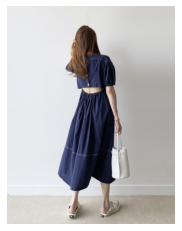

https://cr2.shopping.naver.com/adcr.nhn?x=yELDHY3lRxzEWIN3kmvwnf%2F%2F%2Fw%3D%3DskVmyCI3RC79%2BShKIXbnw7djbT%2F11zYqEGrO6KKQpTqa4tmDlaBbR90wrAHeefwzfVQ%2FPrp5K6xBFBiGV5yr%2BE9qUHsgHKRqzd6nX3jcvUwOdH42U7aNy%2BGYWPOIcmanYIbnIyHqw5fmNUnORNhG2DMbsK7lOjN5D0%2BBf41BIU%2FO0mfrmb2BgLyE8R8DniBE2obm40a3AfVHNV15D72g8jm26YI%2FkcEfVeLDnwysTo3NaAOmgkfHgH5j%2FD5IgKhsW7r7CphDDloknIIzqToq4Y9WN%2FchhV1d04LIGrXJUbzg427ngu9Ku5Ti5fmyIKbcNfm5IA8mkaCGulhqR4WtRHpI0ATT7UDqLFrBc8%2BGsW46JRV9HWAYSLQHIAn38CKb3KIhYOqhO6vxuOUr7jNGLW8faDjCW6HUREq33zSyI9skXU2Q3CoEOb9WqKZOzB6Mr%2B8HWWgC3otGbreswDKzfE%2FFXiEvATs9A12IutpP2SW7Clf3GRjQ8Ic7L3oc21GPlXclenJkzehXk18GgoiHvR%2FJlxHsVv3OjZRZH3NbKgUtkC0o%2F4AytrXopGJk3KiZgdFc5BJomrhzc01OJUlozmYCAi%2B2YT7rM0u4n7NWW%2Fr74A4RTJrO%2BLSAerSsD8rX9KJrQ4Jy5hDKbp6HK69WnnxEPxTTqlSXgHAVAgXQsaz%2F%2F89GWCNmNuNiNBw689xT3N7%2BeSdiOqs%2F1pZjpB03nB7XvjXzP1Z%2BLAq%2BiVK9oua9enxFTYB%2BIC9JqbmKwjMq6&nv_mid=80556695160&cat_id=50000807


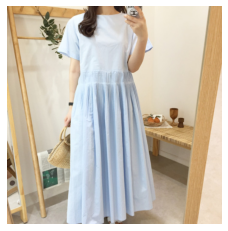

https://cr2.shopping.naver.com/adcr.nhn?x=hNk0KavW6GJ9GJoIFXt6A%2F%2F%2F%2Fw%3D%3Ds%2F%2FErrKd%2FbCsbSrAb3sfbY72Zx4DD0cifwHsLhQb%2FFJ8CmPdiZFrOXzhhliFJwJEvdQXFp%2FgKUx%2B%2FKsvab0jarmVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTX4DvEc%2F%2Fpf%2BS8K8v6H%2BQfgF%2FFNG9UF4YEF%2BmjrfqKu3%2BWxzW%2FI6ua404HE4%2BTjApUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhEC%2F9rlPU11sHwTH3tgzQY6yQ7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB%2BuF0vV595x9eUETRa6OUaS5vbEDbBfW4kzW6i%2FO3C3gkD%2BhhiJy%2BeDJvd2vJjkI8aOy%2F6n1o2yG41tmHlO5ozL4gmaOSJ8HfJMqfNgBncuLzt7Mx46S%2BOGyUwMAuXoPsiBVnqFZ3xSU1LiWDLFdPybf78zS3ngLUhZQ8B%2FLWWKZJA6qO3TN8fle4qydgXmynR2v6bGP4kEcINUl5xxgrLfou%2Be54eAFb6WiH%2BYeA2CnSHhKoH3GzEJI6jIbSQslCF%2BQLFSNj4dcGTZFQQJcJ7hwQxrS2aO6VW4isEoYEC2e%2B2ebxeN5vMDP1GhgKY%2B9redyZJlWW8Tn4k5odZTnqq3NUyQqbnfV1GsKpc9kgNMDTYTh9QSWkQHlxtoh0XBLbuFsGiUzA6Wlo8TCTNFYqmb&nv_mid=82102701061&cat_id=50000807


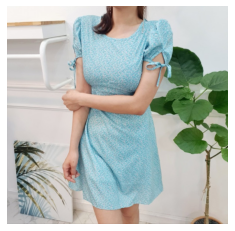

https://cr2.shopping.naver.com/adcr.nhn?x=%2FAJD9EwW3gD0zTVEE0LUo%2F%2F%2F%2Fw%3D%3DsOoaHUygj4o4umjQ1KQiCG2mIWKSGMC5MgsD%2FiHx0paifS6iSYIM2Cad1%2BYF8OoVw2d0KH0hV8tGfWIiOiN1K12M5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiC0vHpuzlkjXZa%2BbJ2mn19x4psUrqJua6Xuljhoekrtl8tO0kh6aOT7jftgsDIS%2FsWc%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58M9qpsvELx0%2FCJMzlXsBecvvrTglJGKkyxL6fKL1PKl9VJvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ%2BMRzn8gca4Z8Ids38w5xXdN0M0SQSuMsPTCWBKV4k1pPGhB8Ps6FHHxGqpxVzRGw0WJsiK6MHTeagZVzKNtndIHhmZHOC9hAOCIvpgAuxCAXpprsjaLGznXHSSF1bBQLm1PLTJ0lZj7boSvLX89SNOkI43su%2FY5KYDk5IUN8TY9uAWa%2FONXPdlSO5mztKwHLTlNtQf%2FP1r0W7G09johMPjkDqo7dM3x%2BV7irJ2BebKdB%2BkWa4uuQUv%2BpycthIUNDwif4Rlk8EP25XyjCdiMg4OIeEqgfcbMQkjqMhtJCyUISFpN2MjPkkaJuZN%2FOOT8ELvmKTS5IqIYPknBB790IXOU5ygz34uR9eMpikPIPk1IEH5qWyowu4yDfPRYCZTpK7YhNVM%2BNdec1hxtgYBZ3HSd3LMYUzf6thytP1nOOp0bWaQ9WDbUF2C9UeBLEENnO8%3D&nv_mid=82049311810&cat_id=50000807


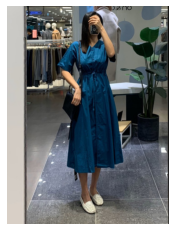

https://cr2.shopping.naver.com/adcr.nhn?x=qtVcwt9B13bNnpOjsSIUe%2F%2F%2F%2Fw%3D%3DsRdASBYg%2F892%2FEcrug6F9LtQX4Si1zgbKxpveCARzLvk2Ub1gkYZ%2FR4YCmEZXv8WfPq3xN2YML6IGJzqd3a1FwIYlFAdf1OFsetsPTCIBnAtPOdYsvqvAV2kweJQXbUmGSHs5mLfhEikBQ3cb34dCSzS1ASjD16W8cv1rZAERWI1ptjxfkeVguITnr3suw5%2BdWEr4Lu5t53ESTApzu1Eu9J9%2Bw5fyb2S%2B0WKUIuNO0Akl8HAYn6NkzRDrGPGQ2ZUx%2FTkzMbu4zG3okbXNZtTiNEaAb%2FOdjaJ2XbA%2BJKlL%2B499LsW4RgipVPKA%2F2IN4cAJ4mmic2vQ8l3OPvPdLBTB5%2B6UB08G4lR0a9fquA%2FPNrJzfuuYK6tYChFEZRW96GYPC9qVOTOYLjvdW5kdd1GPe44FIdX0RH9maAYxxSnIi%2FHoEVeznDAcAeDl1ROjDW%2BrNTTB0XqFPQMfTdvwLf4t4wWQ9CRB7nzeckSWN3exGD8P%2BC9LAr%2BYQXHhzR%2F2yaaJs0Nvb4%2BEtNaszo9B7RYDSw40qNfMUx%2BSkdxRf5VBNzKfERs1pk9bW94dyQN51pXs5eAfZJtrdHeVSlARgxYOcc%2FfkoKQOU4QHXPOy1tp4dJLNGtN4k2FswevYLJbTBXzVq32H7m0tJ13%2BVmycXJy5FfYavdxLQctKYm7Vkpg5zAj9E0TO2aysuIGp5tRx62vDTWfTSbOkeAEaX3XFqDwxSLTKCpcjCk%2BEAj%2FYaZFBtuZMYaYXDwKulq8zErfGhkO&nv_mid=82108844852&cat_id=50000807


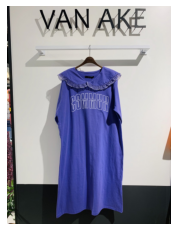

https://cr2.shopping.naver.com/adcr.nhn?x=w9uUJgA1CaiVzp2Nrmsozv%2F%2F%2Fw%3D%3DsA15ZZXMFKD6nK9YreHRWlxbXVjwVhoban87pv5aMDFNM8%2FUZtTOlh7z1sfH4XBjAzCxVcUFoOuteMoKYT6RAnmM5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiCokZ%2BmCTFZmsc19Q3SyG2y2nBgSyPsPX%2FaFksmTCjwO8dCGi%2B7w3HYXr0hFr7yB5ac%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58MvcwaJyugslJObIohizNgCgOd9SB65Ty7C9fw6NSFPtFJvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ%2BcJr8ByxH4A44o7NORw0FQt2jcdvoaksb0uvhLw52q744FIdX0RH9maAYxxSnIi%2FGJoN2dW5aX2KORFDkn%2Bge6qkr03%2FSW6oj5%2BkImC0dhcFXgk%2Fip2ANbS4czQMf%2FPKhAJCBzF%2Bn1IFvM2OnUQNjT9Uzro4Hgzeu38D4R%2F2hckvPPz9bJqARVaGNaYYZVWf09g0dMAlyO5X7DWi64JnHMWzpSUSKALf8O%2B37QRucpWfkIWX3rtrub%2FPErDQjUNFrhfPTGPx4HoJnkyNiQNOkpXcYyB6thuVbUnt2xn3IPgQ1oPQ3rpXe5rLibY%2BATkNKv4bnp9DRi%2FRmVvJhT0do%2BsSCGS4I5p3OWrC1BQuFMZIjtxsF%2FdHgt9zoNLn4pwoMzEu3BZiTFp4%2FMnJBa2AZ%2B&nv_mid=82399759588&cat_id=50000807


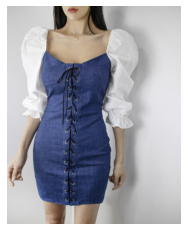

https://cr2.shopping.naver.com/adcr.nhn?x=I3hvINClA2vpN8%2BgAbNojP%2F%2F%2Fw%3D%3DscfPhdMX73ZToGyry843ZOnTruzcQhd2sqeTuMcEjpvleTlogko6w9SdMFImvDSjcSWJgw9whud2Qu1EJ2wtIc6l6LyjznO%2FsH0Pfuqo3X76p4IBYqxUkkcWo13LGeTJNyS0QB9iNaJspmiDqRlpSCDSxq0w8iEfHpDrcMo0MeH8JtvblTOVgHGE4Jby0jEs4htML6LI25Brmp2LQKrVkwn1wFkbO30K4iH8DIsVS%2F5IqUOY4GKYy22Pvlriy3rEEwb3LC15L3ab3zyLHppOZtbnorlAFBEuxAUIhghMF0kClopbpieagPRoipJ%2FEZ19DagiK5o1NShQDksdLRQC9awVOsrG0SlPHzAh5vONfPLCDr8EPOFL%2Fc%2Bnt2VDyjbwcjUs7P5%2BuRD0GqioUrvc4JHPanSkANham39%2FSeanLQ0fVuOgKF0DwqMv0aON%2BJuPurhfqHs%2FOmp9bEBKFlDUZNtriLDesPQ%2Fhz%2Bh%2F%2F%2F1fViUGxNo4ZZT7Rlx%2BjQHOgDZQdA%2BTQ4g65GxjlsHsdMAw8gVmbHw8vTIoEkRkz%2FwDXqfsp3LV7uIWxp6YMmWbG0ps1h3LCBm7mFiSST0XYYYqkeFGhxYlxcYmmv7ktYOJCkMeqfDdfU5Sp3VdxgGNkm4P%2Ff35LqlWV8QYxjdO70ol0VpLJ07VHnVlvXOY6Tp8rpVWE3WaR66rbHCgjcUUcBYLU3HxqbFIKgpCH4W6OV%2FJHtiE1Uz4115zWHG2BgFncdKJXlWQ5s%2BL2JU9EHUobO6ol6TlF0GVUDfigldVoQsazA%3D%3D&nv_mid=82414480469&cat_id=50000807


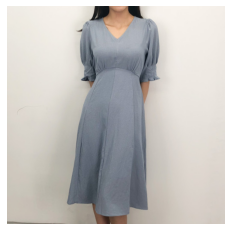

https://cr2.shopping.naver.com/adcr.nhn?x=NzjoQGqBELtLLzrkwACJdv%2F%2F%2Fw%3D%3DsLmhPDdo%2B2xNOpNQd4iIpX8y10p61jZxA8eSFwvXs5WfkRN6x3LlvQCtau5os5bhC5aLUWniLpima0bu4coIu1oYlFAdf1OFsetsPTCIBnAtPOdYsvqvAV2kweJQXbUmGZ3Eej29565pv4XhOIep8%2FRjTGk8gC9%2FEOZJLL24Q5fZwtFF7gZ6YaD%2FcTuoE5%2F%2BIlQdlMuvvhBmIRlGFjVUrgJ9%2Bw5fyb2S%2B0WKUIuNO0Akl8HAYn6NkzRDrGPGQ2ZUxCJMbK%2BCK%2F4seErh26wfZIUaAb%2FOdjaJ2XbA%2BJKlL%2B499LsW4RgipVPKA%2F2IN4cAJ4mmic2vQ8l3OPvPdLBTB5%2B6UB08G4lR0a9fquA%2FPNrJqfEqCzGKn2sMZxGr3esbNOMzvoHFqK79yWFBCkQ1Pfhrv6tDzHWai9n4avpR9ePjYFGYdKILpNHWHbSdfmBX4TuIRXuyCrDH%2F1EoOGbQUaC5eOJFi%2F2qaNPj0qYanWgfdk%2FfxU9l0gNqEchFnmUBKFGIQ6xiC2E8ahu62NiYCNCHDHYOJSMrL%2B8spoID6EftiM17LCxj1gxoPpYfnBaVxFlnnRQopQp3CJ2yWGenWjvGCtukxUYu8DjOehUP3Qm3ZLyC%2BSNADDCSfNzBB1INBWrAcopg7vIE6MvN8qQgSgFkxo%2BRqqB3SKEXGKdPJEv4upU%2Fd6jwWGIDFzsSLEZkGcQH9jf2jhnFUW6gg%2BzZwGjCll8pBak54eR%2BHZEPcUcSxIIZLgjmnc5asLUFC4UxkdIW%2FtV%2FKMKBPJZw3fokcoRmOspMYawv%2B5aglUPEk8%2BBenxFTYB%2BIC9JqbmKwjMq6&nv_mid=82411689390&cat_id=

In [10]:
# DB이미지데이터
df1 = pd.DataFrame(proba)
df1 = df1.T
df1=df1.astype('float64')
df2 = pd.read_csv('result4.csv',index_col=0,header=None)
# 입력데이터를 DB이미지데이터와 합치기
df1.columns=df2.columns
merge_df = pd.merge(df1,df2, how='outer')
from sklearn.metrics.pairwise import cosine_similarity
log=0
for (black,blue,green,red) in zip(merge_df[5],merge_df[6],merge_df[7],merge_df[8]):
    merge_df[5][log]=math.log(black*10**8)
    merge_df[6][log]=math.log(blue*10**3)
    merge_df[7][log]=math.log(green*10**4)
    merge_df[8][log]=math.log(red*10**3)
    log=log+1
cosine = pd.DataFrame(cosine_similarity(merge_df[0:10000]))
result=cosine[0].sort_values(ascending=False)
df3 = pd.read_csv('./final_200424_AllDB.CSV',index_col=0)
df3.iloc[result.index[1:15]]
for (image, link) in zip(df3.iloc[result.index[1:15]]['imagefile'], df3.iloc[result.index[0:15]]['link']):
    I = io.imread('./0423_final_crawl/'+image)
    plt.imshow(I); plt.axis('off'); plt.show()    
    print(link)

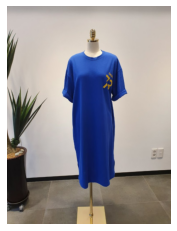

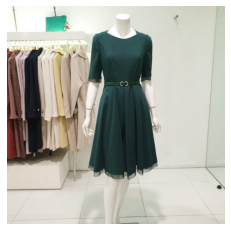

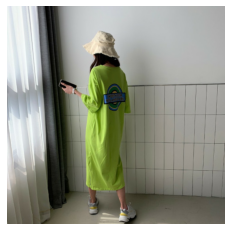

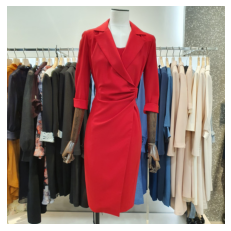

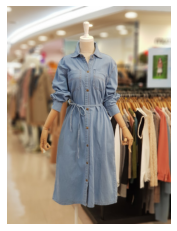

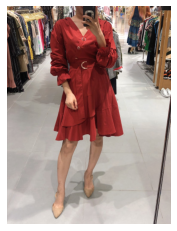

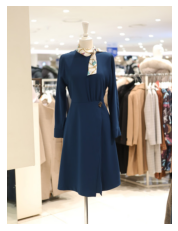

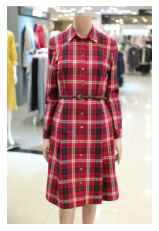

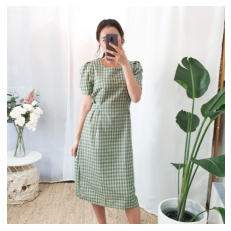

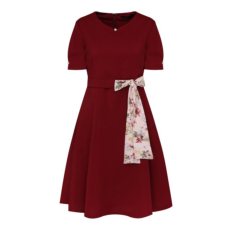

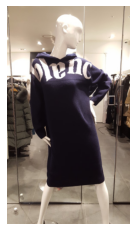

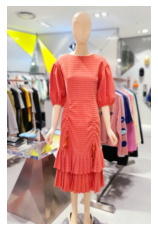

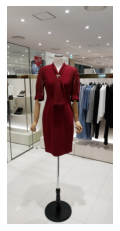

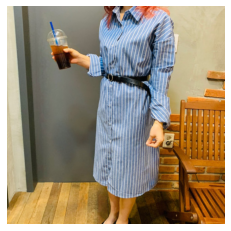

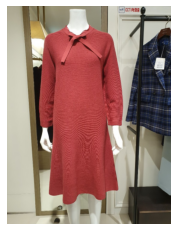

In [6]:
for link in df3.iloc[result.index[-15:]]['imagefile']:
    I = io.imread('../0423_final_crawl/'+link)
    plt.imshow(I); plt.axis('off'); plt.show()

In [7]:
mlb.classes_

array(['5부', '7부', 'A라인', 'H라인', 'black', 'blue', 'green', 'red', '기하학',
       '긴팔', '도트', '랩', '레오파드', '레터링', '로고', '롱', '머메이드', '무지', '미니',
       '미디', '민소매', '반팔', '벌룬', '스트라이프', '아가일', '언밸런스', '체크', '츄리닝',
       '캐릭터', '캡소매', '티어드', '프린트', '플라워', '플리츠주름'], dtype=object)